## Modelo de Gompertz
Estudiar el comportamiento del modelo de Gompertz para el crecimiento de tumores:  

\begin{cases}
\frac{dV}{dt} = aVe^{-\beta t}\\
V(t=0) = 1mm^3
\end{cases}

- $a $: es la tasa inicial de proliferación
- $\beta$ es la tasa de decrecimiento exponencial de la tasa de proliferación

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
sp.init_printing()

In [2]:
#Definicion de variables
t,V0, a, C1 =sp.symbols('t Vo a C1')
K, b = sp.symbols('K b', positive=True)
V = sp.Function('V')

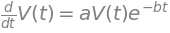

In [3]:
#Modelo
gompertz = sp.Eq(V(t).diff(), a*V(t)*sp.exp(-b*t))
gompertz

In [4]:
#Solucion modelo
solucion_gomp = sp.dsolve(gompertz)
solucion_gomp

A continuación expresamos la solución en función de la condición inicial $V_0$ en $t=0$

In [5]:
gomp2 = sp.Eq(V(t).subs(t,0).subs(V(0), V0), solucion_gomp.rhs.subs(t,0))
gomp2

Resolvemos la anterior ecuación para obtener la constante $c_1$ en función de la condición inicial $V_0$ y de $K$

In [6]:
#Calculamos el valor de la constante C1
cte_gomp = sp.solve(gomp2,C1)
cte_gomp

Solución general en función de la condición y los parámetros del modelo: $a$ y $b$

In [7]:
gomp3 = solucion_gomp.subs(C1,cte_gomp[0])
gomp3

In [8]:
sol_gomp_simplificado = sp.simplify(gomp3)
sol_gomp_simplificado

#### Ecuación de Gompertz
    - Ecuación:
$$	
\begin{cases}
\frac{dV}{dt} = aVe^{-\beta t}\\
V(t=0) = 1mm^3
\end{cases}
$$
    - Solución:
$$
V(t)= V_0e^{\frac{a(1-e^{-bt})}{b}}
$$

#### Estudio de los puntos de equilibrio

In [9]:
gompertz.rhs

In [10]:
gomp_crit = sp.solve(gompertz.rhs, V(t))
gomp_crit

In [11]:
pendiente_0 = gompertz.rhs.diff(V(t)).subs(V(t), gomp_crit[0])
pendiente_0

#### Representación gráfica del Modelo de Gompertz


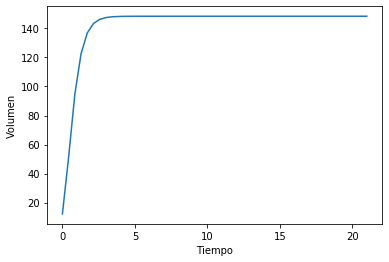

In [20]:
tiempo = np.linspace(0,21,50)



solp_l = sp.lambdify(t, edo_gomp_solp.subs({a:5, b:2, V0:1}))
plt.plot(tiempo, solp_l(tiempo))
plt.xlabel("Tiempo")
plt.ylabel("Volumen")
plt.savefig('modelo_Gompertz.png')
plt.show()